In [9]:
with open("./img_lena.bmp", 'rb') as arquivo:
    header = arquivo.read(14)
    header_dib = arquivo.read(40)

    largura =  int.from_bytes(header_dib[4:8], byteorder='little')
    altura =  int.from_bytes(header_dib[8:12], byteorder='little')
    cor = int.from_bytes(header_dib[14:16], byteorder='little')

    tamanho_arquivo = int.from_bytes(header[2:6], byteorder='little')  
    deslocamento_dados = int.from_bytes(header[10:14], byteorder='little')  

    print(f"Tamanho do arquivo: {tamanho_arquivo}")
    print(f"Deslocamento dos dados de imagem: {deslocamento_dados}")

    arquivo.seek(deslocamento_dados)

    if header[:2] != b'BM':
        raise ValueError("Arquivo inválido")
    if cor != 24:
        raise ValueError("Suporta apenas imagens de 24 bits")
    
    padding = (4 - (largura * 3) % 4) % 4

    pixels = []

    for y in range(altura):
        linha = arquivo.read(largura * 3)
        
        if len(linha) != largura * 3:
            raise ValueError(f"Erro: Esperado {largura * 3} bytes, mas lemos {len(linha)} bytes.")

        for x in range(largura):
            b = linha[x * 3 + 0]
            g = linha[x * 3 + 1]
            r = linha[x * 3 + 2]
            cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
            pixels.append(cinza)

        arquivo.read(padding)

    # print(header)
    # print(header_dib)

    print(altura, largura, pixels[:20])

Tamanho do arquivo: 786486
Deslocamento dos dados de imagem: 54
512 512 [101, 108, 109, 121, 131, 133, 139, 148, 130, 134, 139, 135, 136, 135, 138, 137, 138, 142, 144, 145]


In [10]:
from PIL import Image
import numpy as np

def exibir_imagem(pixels):
    linhas = [pixels[i * largura:(i + 1) * largura] for i in range(altura)]

    linhas_invertidas = linhas[::-1]

    imagem_array = np.array(linhas_invertidas, dtype=np.uint8).reshape((altura, largura))

    imagem = Image.fromarray(imagem_array)

    imagem.show()



In [11]:
limiar  = 105
pixels_bin = []
for p in pixels:
    if p > limiar:pixels_bin.append(255)
    else:pixels_bin.append(0)



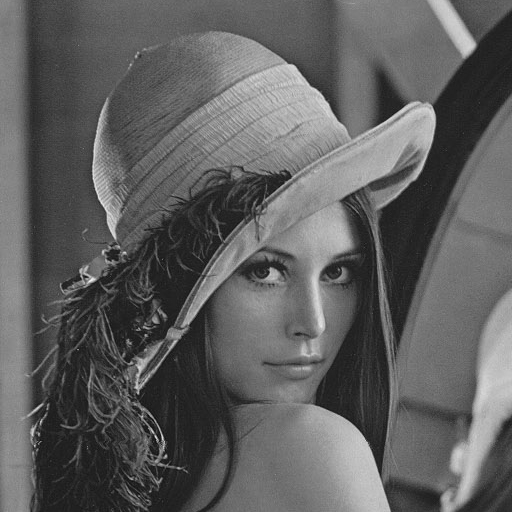

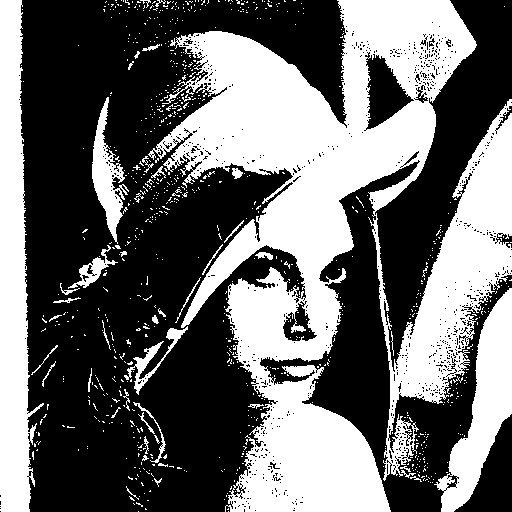

In [12]:
exibir_imagem(pixels)
exibir_imagem(pixels_bin)